In [83]:
from gcp_interaction import read_blob_to_pandas
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
with open("excess-energy-prediction-393ec78547e4.json", "r") as f:
    gcp_login_info = json.load(f)
with open("gcp_info.json", "r") as f:
    bucket_name = json.load(f)["bucket_name"]

In [3]:
weather_dir = r"transformed/weather_combined.csv"
df = read_blob_to_pandas(bucket_name, weather_dir, low_memory=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53240 entries, 0 to 53239
Data columns (total 81 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        53240 non-null  object 
 1   ind_BEL     53240 non-null  int64  
 2   rain_BEL    53240 non-null  float64
 3   ind.1_BEL   53240 non-null  int64  
 4   temp_BEL    53240 non-null  float64
 5   ind.2_BEL   53240 non-null  int64  
 6   wetb_BEL    53240 non-null  float64
 7   dewpt_BEL   53240 non-null  float64
 8   vappr_BEL   53240 non-null  float64
 9   rhum_BEL    53240 non-null  int64  
 10  msl_BEL     53240 non-null  float64
 11  ind.3_BEL   53240 non-null  int64  
 12  wdsp_BEL    53240 non-null  int64  
 13  ind.4_BEL   53240 non-null  int64  
 14  wddir_BEL   53240 non-null  int64  
 15  ww_BEL      53240 non-null  object 
 16  w_BEL       53240 non-null  object 
 17  sun_BEL     53240 non-null  object 
 18  vis_BEL     53240 non-null  object 
 19  clht_BEL    53240 non-nul

In [5]:
df.describe()

,ind_BEL,rain_BEL,ind.1_BEL,temp_BEL,ind.2_BEL,wetb_BEL,dewpt_BEL,vappr_BEL,rhum_BEL,msl_BEL,...,msl_CORK,ind.3_CORK,wdsp_CORK,ind.4_CORK,wddir_CORK,ww_CORK,w_CORK,sun_CORK,clht_CORK,clamt_CORK
count,53240.0,53240.000000,53240.0,53240.000000,53240.0,53240.000000,53240.000000,53240.000000,53240.000000,53240.000000,...,53240.000000,53240.000000,53240.000000,53240.000000,53240.000000,53240.000000,53240.000000,53240.000000,53240.000000,53240.000000
mean,0.0,0.152740,0.0,10.539632,0.0,9.122485,7.524267,10.765147,81.911927,1012.067305,...,1014.396153,1.998948,9.724699,1.998948,213.138054,16.520661,32.079395,0.171232,286.107344,5.529602
std,0.0,0.503739,0.0,3.969103,0.0,3.776028,4.231855,3.036890,11.135068,13.275289,...,12.200100,0.051997,5.092314,0.051997,84.496627,23.103745,27.868446,0.331517,419.439877,2.381666
min,0.0,0.000000,0.0,-3.300000,0.0,-4.400000,-9.700000,2.900000,24.000000,959.100000,...,967.700000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,0.0,0.000000,0.0,7.800000,0.0,6.400000,4.400000,8.300000,74.000000,1003.400000,...,1006.900000,2.000000,6.000000,2.000000,160.000000,2.000000,11.000000,0.000000,11.000000,4.000000
50%,0.0,0.000000,0.0,10.500000,0.0,9.300000,7.800000,10.600000,84.000000,1013.600000,...,1015.800000,2.000000,9.000000,2.000000,220.000000,2.000000,11.000000,0.000000,35.000000,7.000000
75%,0.0,0.000000,0.0,13.500000,0.0,11.900000,10.600000,12.800000,91.000000,1021.600000,...,1022.800000,2.000000,13.000000,2.000000,280.000000,25.000000,62.000000,0.100000,999.000000,7.000000
max,0.0,14.900000,0.0,28.000000,0.0,22.100000,19.400000,22.500000,100.000000,1050.600000,...,1048.900000,6.000000,43.000000,6.000000,360.000000,97.000000,98.000000,1.000000,999.000000,8.000000


Let's check the data dictionary to see what these features are. 
There's lots of information included in the KeyHourly.txt file but this is what we're most interested in. 

| ID          | Element                    | Unit  |
|-------------|----------------------------|-------|
| rain        | Precipitation Amount       | (mm)  |
| temp        | Air Temperature            | (°C)  |
| wetb        | Wet Bulb Air Temperature   | (°C)  |
| dewpt       | Dew Point Air Temperature  | (°C)  |
| vappr       | Vapour Pressure            | (hpa) |
| rhum        | Relative Humidity          |  (%)  |
| msl         | Mean Sea Level Pressure    | (hPa) |
| wdsp        | Mean Hourly Wind Speed     | (kt)  |


No info on the IND columns, let's look closer. 

In [17]:
print(df['ind_BEL'].unique())
print(df['ind_CORK'].unique())

[0]
[0 3 2 1]


Not sure what these represent, perhaps some sort of indicator - I'm going to drop them for now. 

In [23]:
to_drop = [x for x in df.columns if "ind" in x]
df = df.drop(to_drop, axis = 1)

# Exploration

In [88]:
# Do we have a full dataset?
df.isna().sum().sum()

0

# Plots

Let's look at the distribution of temperature for our sites and see if it looks reasonable. 

In [25]:
df.columns

Index(['date', 'rain_BEL', 'temp_BEL', 'wetb_BEL', 'dewpt_BEL', 'vappr_BEL',
       'rhum_BEL', 'msl_BEL', 'wdsp_BEL', 'wddir_BEL', 'ww_BEL', 'w_BEL',
       'sun_BEL', 'vis_BEL', 'clht_BEL', 'clamt_BEL', 'rain_DUB', 'temp_DUB',
       'wetb_DUB', 'dewpt_DUB', 'vappr_DUB', 'rhum_DUB', 'msl_DUB', 'wdsp_DUB',
       'wddir_DUB', 'ww_DUB', 'w_DUB', 'sun_DUB', 'vis_DUB', 'clht_DUB',
       'clamt_DUB', 'rain_SHAN', 'temp_SHAN', 'wetb_SHAN', 'dewpt_SHAN',
       'vappr_SHAN', 'rhum_SHAN', 'msl_SHAN', 'wdsp_SHAN', 'wddir_SHAN',
       'ww_SHAN', 'w_SHAN', 'sun_SHAN', 'vis_SHAN', 'clht_SHAN', 'clamt_SHAN',
       'rain_CORK', 'temp_CORK', 'wetb_CORK', 'dewpt_CORK', 'vappr_CORK',
       'rhum_CORK', 'msl_CORK', 'wdsp_CORK', 'wddir_CORK', 'ww_CORK', 'w_CORK',
       'sun_CORK', 'vis_CORK', 'clht_CORK', 'clamt_CORK'],
      dtype='object')

In [64]:
df_temp = pd.concat([df['date'], 
                     df['temp_DUB'], 
                     df['temp_SHAN'], 
                     df['temp_CORK'], 
                     df['temp_BEL']], 
                    axis = 1)
df_temp_mdf = pd.melt(df_temp, id_vars = 'date')
df_temp_mdf = df_temp_mdf.replace({'temp_DUB':'Dublin', 
                                   'temp_SHAN':'Shannon', 
                                   'temp_CORK':'Cork',
                                   'temp_BEL':'Belmullet'})

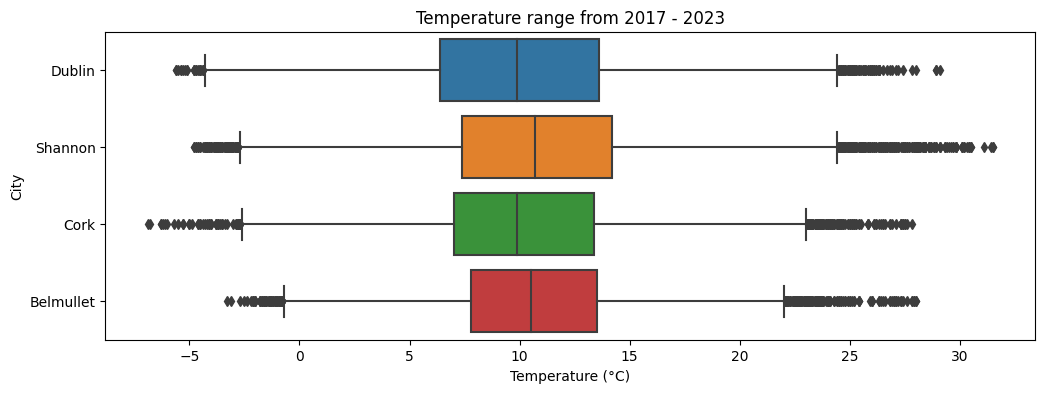

In [84]:
fig, ax = plt.subplots(figsize = (12,4))
temp_plot = sns.boxplot(data = df_temp_mdf, x = 'value', y = 'variable', ax =ax).set(
    xlabel='Temperature (°C)', 
    ylabel='City', 
    title = 'Temperature range from 2017 - 2023'
)
plt.savefig(Path('Outputs', 'Plots', 'temp_boxplot.png'), facecolor = 'white')

# Windspeed

In [66]:
df_wdsp = pd.concat([df['date'], 
                     df['wdsp_DUB'], 
                     df['wdsp_SHAN'], 
                     df['wdsp_CORK'], 
                     df['wdsp_BEL']], 
                    axis = 1)
df_wdsp_mdf = pd.melt(df_wdsp, id_vars = 'date')
df_wdsp_mdf = df_wdsp_mdf.replace({'wdsp_DUB':'Dublin', 
                                   'wdsp_SHAN':'Shannon', 
                                   'wdsp_CORK':'Cork',
                                   'wdsp_BEL':'Belmullet'})

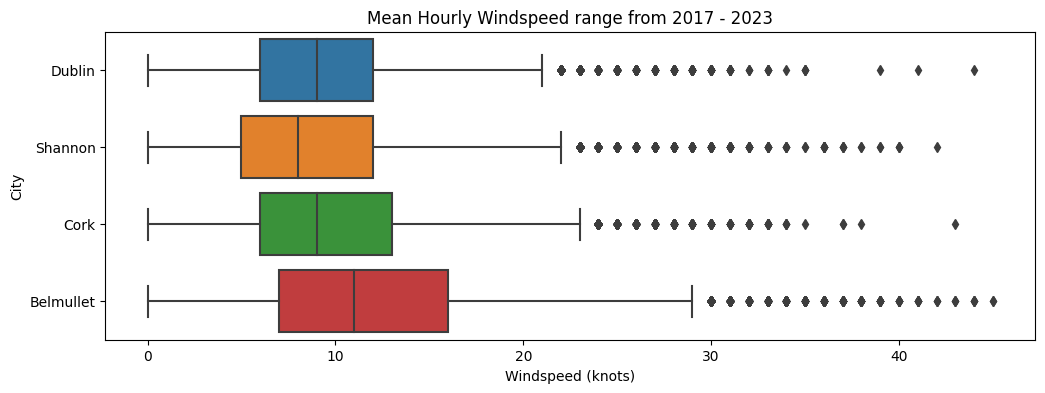

In [85]:
fig, ax = plt.subplots(figsize = (12,4))
wind_plot = sns.boxplot(data = df_wdsp_mdf, x = 'value', y = 'variable', ax =ax).set(
    xlabel='Windspeed (knots)', 
    ylabel='City', 
    title = 'Mean Hourly Windspeed range from 2017 - 2023'
)
plt.savefig(Path('Outputs', 'Plots', 'windspeed_boxplot.png'), facecolor = 'white')

# Rain

In [70]:
df_rain = pd.concat([df['date'], 
                     df['rain_DUB'], 
                     df['rain_SHAN'], 
                     df['rain_CORK'], 
                     df['rain_BEL']], 
                    axis = 1)
df_rain_mdf = pd.melt(df_rain, id_vars = 'date')
df_rain_mdf = df_rain_mdf.replace({'rain_DUB':'Dublin', 
                                   'rain_SHAN':'Shannon', 
                                   'rain_CORK':'Cork',
                                   'rain_BEL':'Belmullet'})

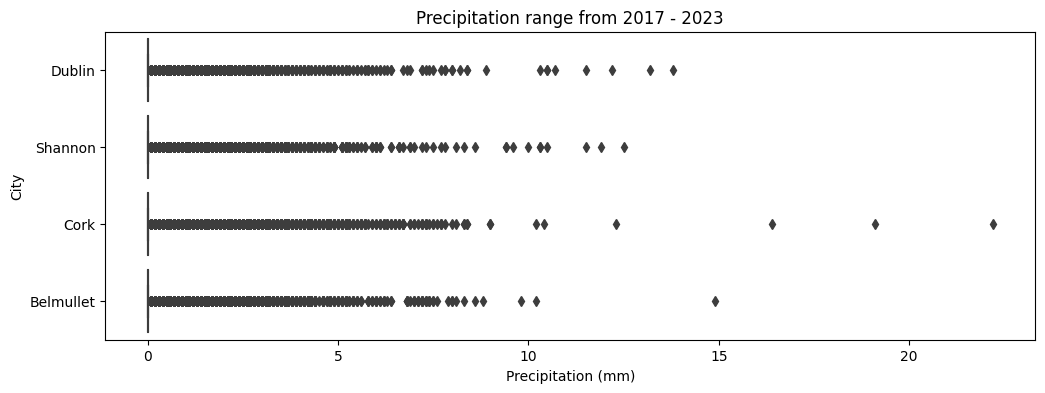

In [86]:
fig, ax = plt.subplots(figsize = (12,4))
rain_plot = sns.boxplot(data = df_rain_mdf, x = 'value', y = 'variable', ax =ax).set(
    xlabel='Precipitation (mm)', 
    ylabel='City', 
    title = 'Precipitation range from 2017 - 2023'
)
plt.savefig(Path('Outputs', 'Plots', 'rain_boxplot.png'), facecolor = 'white')